In [4]:
import pandas as pd
from googleapiclient.discovery import build
from IPython.display import JSON


In [5]:
# Your YouTube API key
api_key=''

# The YouTube channel IDs you want to retrieve data for
channel_ids = ['UCs5wAPodliO0oVxiTD8ruvg']

# Create an API client to make requests to the YouTube API.
YouTube = build( "youtube" , "v3" , developerKey=api_key)

In [6]:

def fetch_channel_stats(youtube, channel_ids):
    # Initialize an empty list & Making a request to fetch channel data
    all_channel_data = []
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=','.join(channel_ids)
    )
    response = request.execute()


    for item in response['items']:
        # Extract & Append the channel data to the list
        channel_info = {
            'channelName': item['snippet']['title'],
            'subscribers': item['statistics']['subscriberCount'],
            'views': item['statistics']['viewCount'],
            'totalVideos': item['statistics']['videoCount'],
            'playlistId': item['contentDetails']['relatedPlaylists']['uploads']}

        all_channel_data.append(channel_info)

    return pd.DataFrame(all_channel_data)

channels_data = fetch_channel_stats(YouTube, channel_ids)
channels_data

,channelName,subscribers,views,totalVideos,playlistId
0,Biaheza,1340000,119927445,178,UUs5wAPodliO0oVxiTD8ruvg


In [7]:
playlistId="UUs5wAPodliO0oVxiTD8ruvg"

def fetch_video_ids(youtube, playlist_id , video_ids=None, next_pt=None):

    # Initialize the video_ids
    if video_ids is None:
        video_ids = []

    # Make a request to fetch the first batch
    request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId=playlist_id,
        maxResults = 50,
        pageToken=next_pt )

    response = request.execute()

    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])

    # Check if there are more video IDs to fetch
    next_pt = response.get('nextPageToken')
    if next_pt:

        return fetch_video_ids(youtube, playlist_id, video_ids, next_pt)
    else:
        # Return the collected video IDs if there are no more pages of results
        return video_ids

video_ids = fetch_video_ids(YouTube, playlistId)
len(video_ids)

178

In [8]:
def fetch_video_details(youtube, video_ids):
    all_video_info = []

    # Process video IDs in batches of 50 (default max limit)
    for i in range(0, len(video_ids), 50):
        batch_ids = video_ids[i:i+50]

        # request to fetch infos for current batch of video_ids
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(batch_ids)
        )
        response = request.execute()

        # Extract infos from the API response and append to all_video_info
        for video in response['items']:
            video_info = {
                'video_id': video['id'],
                'channelTitle': video['snippet']['channelTitle'],
                'title': video['snippet']['title'],
                'description': video['snippet']['description'],
                'tags': video['snippet'].get('tags', []),
                'publishedAt': video['snippet']['publishedAt'],
                'viewCount': video['statistics']['viewCount'],
                'likeCount': video['statistics']['likeCount'],
                'favoriteCount': video['statistics'].get('favoriteCount', 0),
                'commentCount': video['statistics'].get('commentCount', 0),
                'duration': video['contentDetails']['duration'],
                'definition': video['contentDetails']['definition'],
                'caption': video['contentDetails'].get('caption', None)
            }
            all_video_info.append(video_info)

    return pd.DataFrame(all_video_info)

video_d = fetch_video_details(YouTube, video_ids)
video_d


,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption
0,RmB1kmsXOfM,Biaheza,I Helped a Subscriber Get Rich to Prove it’s N...,I Helped a Subscriber Get Rich to Prove it’s N...,[],2023-07-22T19:00:13Z,504496,30277,0,1647,PT12M19S,hd,false
1,CBfK93z9w0Q,Biaheza,"My Simple $5,000 / Day Stock Trading Strategy",My Dropshipping Course: \nhttps://biahezacours...,[],2023-06-14T19:12:33Z,423929,22712,0,1039,PT9M16S,hd,false
2,OA4ATYe5KMA,Biaheza,Zero to a Million Dollar Business in a Month,My Dropshipping Course: \nhttps://biahezacours...,[],2023-05-21T19:00:41Z,864461,46423,0,2005,PT9M2S,hd,false
3,eAxmZP5CMpo,Biaheza,Quitting the YouTube Hamster Wheel,My Dropshipping Course: \nhttps://biahezacours...,[],2023-03-11T20:58:53Z,296911,22093,0,1709,PT9M26S,hd,false
4,Uxt6adK7qOU,Biaheza,"I Gave an Ai Bot $50,000 to Trade Stocks",My Dropshipping Course: \nhttps://biahezacours...,[],2022-12-25T00:03:09Z,1032556,40906,0,1984,PT10M3S,hd,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,Itry0KhrGfI,Biaheza,"HOW TO GAIN 1,000 ACTIVE FOLLOWERS ON INSTAGRA...",Follow for follow still works!!! Hope you guys...,"[Grow Instagram, Instagram Followers, IG Hacks...",2018-12-17T22:05:45Z,2459322,91503,0,5531,PT10M3S,hd,false
174,_p2IMfSMe-E,Biaheza,Best Way to Make Money Online for Teens,Best Way to Make Money Online for Teenage\n\nS...,"[dropshipping, shopify, dropshipping course, f...",2018-12-11T22:13:42Z,38700,1875,0,69,PT10M7S,hd,false
175,PGNz2Mq0s6U,Biaheza,How to Make Money on Instagram | Make money on...,In this video I go over a way you can start ma...,"[Instagram, Grow IG, Make money online, Money ...",2018-12-07T23:20:18Z,395779,18394,0,764,PT8M21S,hd,false
176,ZIPa-gIwjOA,Biaheza,Revealing Three Winning Dropshipping Shopify P...,"Really hyped on this video, hope it helps you ...","[Dropshipping, Shopify, Winning Products, Mark...",2018-11-30T02:45:10Z,43454,1517,0,99,PT7M2S,hd,false


In [9]:
# Convert count columns to numeric
numeric_cols = ['viewCount', 'likeCount', 'commentCount']
video_d[numeric_cols] = video_d[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)



In [11]:
# Publish day in the week & convert duration to seconds
from dateutil import parser
import isodate

video_d['publishedAt'] = video_d['publishedAt'].apply(lambda x: parser.parse(x))
video_d['pushblishDayName'] = video_d['publishedAt'].apply(lambda x: x.strftime("%A"))

video_d['durationSecs'] = video_d['duration'].apply(lambda x: isodate.parse_duration(x))
video_d['durationSecs'] = video_d['durationSecs'].astype('timedelta64[s]')

video_d[['durationSecs', 'duration']]

,durationSecs,duration
0,739.0,PT12M19S
1,556.0,PT9M16S
2,542.0,PT9M2S
3,566.0,PT9M26S
4,603.0,PT10M3S
...,...,...
173,603.0,PT10M3S
174,607.0,PT10M7S
175,501.0,PT8M21S
176,422.0,PT7M2S


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### Best performing videos

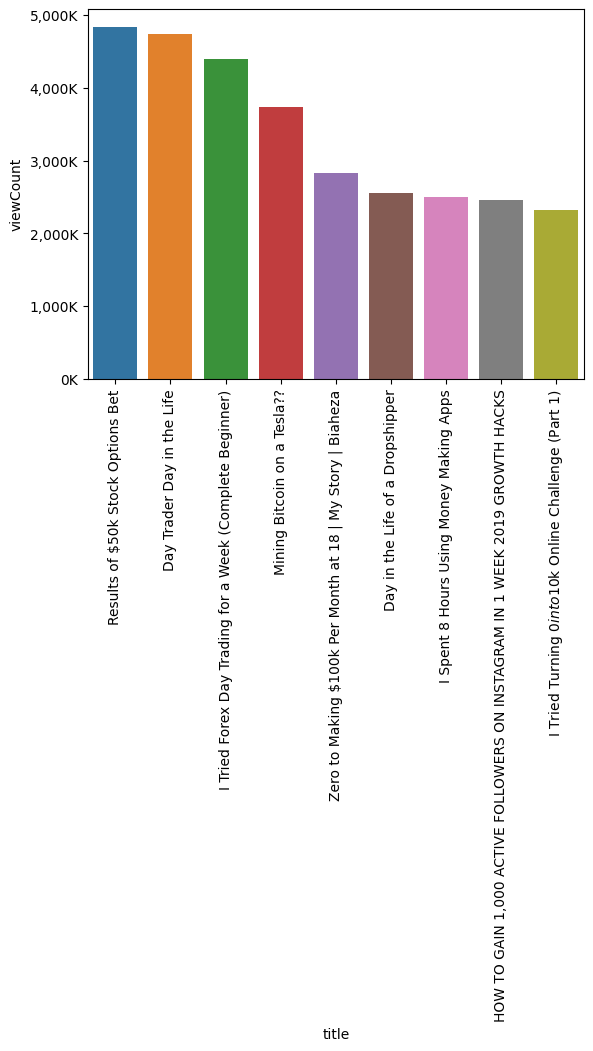

In [13]:
top_videos = video_d.sort_values('viewCount', ascending=False).head(9)

ax = sns.barplot(x='title', y='viewCount', data=top_videos)
plt.xticks(rotation=90)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}K'.format(x/1000)))

plt.show()

### View distribution per video

<Axes: >

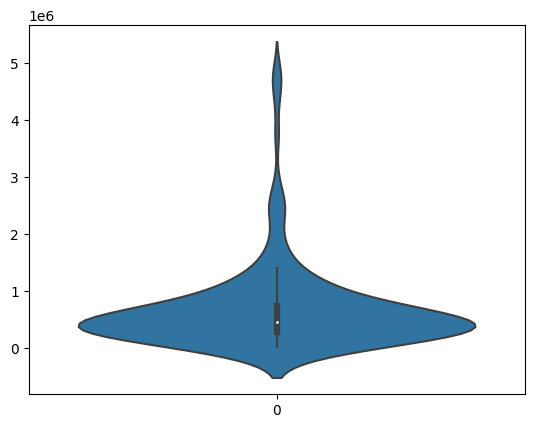

In [14]:
sns.violinplot(video_d['viewCount'])

### Wordcloud for video titles

In [15]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

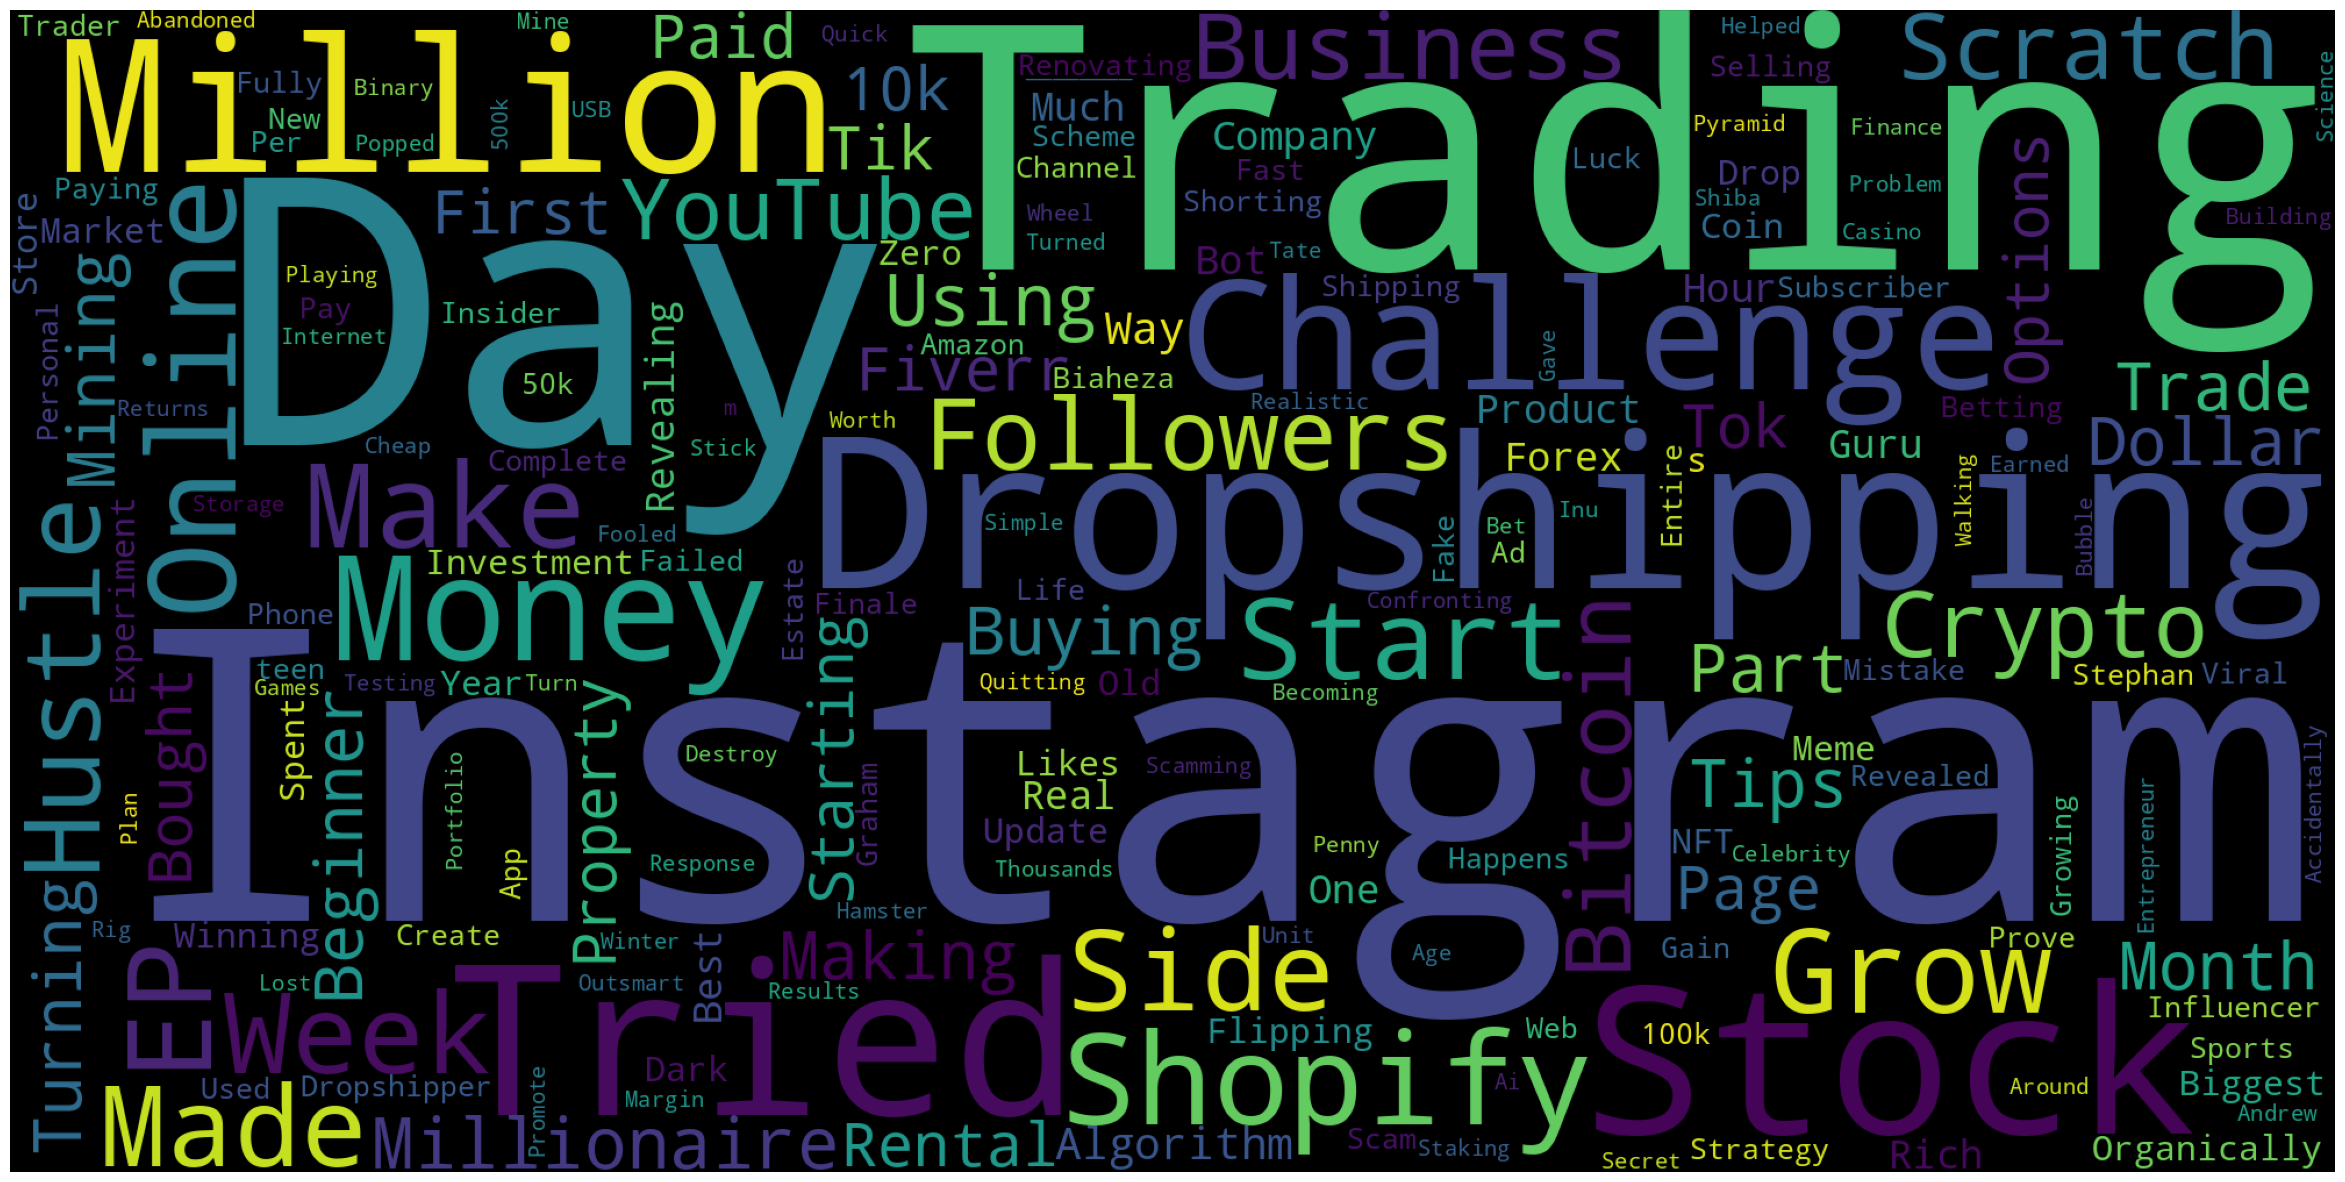

In [16]:
stop_words = set(stopwords.words('english'))
video_d['title_no_stopwords'] = video_d['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_d['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud)
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black',
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

### Upload schedule

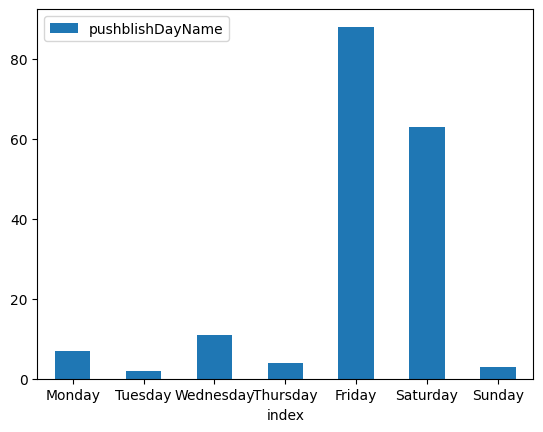

In [17]:
day_df = pd.DataFrame(video_d['pushblishDayName'].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar(x='index', y='pushblishDayName', rot=0)